In [23]:
!nvidia-smi
import sys
sys.path.append('../../../')
import jax
import jax.numpy as np
import os
# from cfd_am import *
from jax_am.cfd.cfd_am import *
from jax_am.common import json_parse, box_mesh
import time
os.environ["CUDA_VISIBLE_DEVICES"]="0"
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
%matplotlib notebook

Fri Jun  9 13:47:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     On   | 00000000:01:00.0 Off |                  Off |
| 35%   51C    P8    29W / 260W |  43858MiB / 48593MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     On   | 00000000:21:00.0 Off |                  Off |
| 33%   

In [24]:
crt_file_path = os.getcwd()

data_dir = os.path.join(crt_file_path, 'data')

domain_x = 1.e-3
domain_y = 2.e-4
domain_z = 1.e-4
Nx = 464
Ny = 93 
Nz = 46

mesh = mesh3d([domain_x, domain_y, domain_z], [Nx, Ny, Nz])
mesh_local = mesh3d([0.75*domain_x, 0.5*domain_y, 0.4*domain_z], 
                    [round(0.75*Nx), round(0.5*Ny), round(0.4*Nz)])
meshio_mesh = box_mesh(Nx, Ny, Nz, domain_x, domain_y, domain_z)
    
cfd_args = json_parse(os.path.join(crt_file_path, 'cfd_params.json'))

cfd_args['mesh'] = mesh
cfd_args['mesh_local'] = mesh_local
cfd_args['meshio_mesh'] = meshio_mesh
cfd_args['cp'] = lambda T: (0.2441*np.clip(T,300,1563)+338.39) 
cfd_args['k'] = lambda T: 0.0163105*np.clip(T,300,1563)+4.5847
cfd_args['data_dir'] = data_dir

example = AM_3d(cfd_args)

{
    "rho": 8440,
    "visco": 0.007,
    "Marangoni": -2e-05,
    "dt": 1e-06,
    "t_OFF": 0.0024,
    "speed": 0.5,
    "X0": [
        0.0002,
        0.0001,
        0.0001
    ],
    "rb": 5e-05,
    "eta": 0.43,
    "P": 100,
    "T_ref": 300,
    "Ts": 1563,
    "Tl": 1623,
    "latent_heat": 270000,
    "heat_source": 0,
    "write_sol_interval": 20,
    "check_sol_interval": 5
}
Surface heat source model is used.


In [26]:
start_time = time.time()
for i in range(0, 400):
    example.time_integration()
    print(f'Step = {i}, time:{time.time() - start_time}, T_max:{example.T.max()}, vmax:{np.linalg.norm(example.vel,axis=3).max()}')
    start_time = time.time()

Step = 0, time:1.0354077816009521, T_max:3020.951874479692, vmax:0.06934997756570356
Step = 1, time:1.0803399085998535, T_max:3126.9292782597972, vmax:0.07807647842121654
Step = 2, time:1.0254616737365723, T_max:3226.877464125929, vmax:0.08851662005090838
Step = 3, time:1.0692667961120605, T_max:3317.442914954875, vmax:0.09993427700558534
Step = 4, time:1.0638394355773926, T_max:3403.919801868244, vmax:0.1117244145185055
Step = 5, time:1.0470068454742432, T_max:3489.838574847073, vmax:0.12369126070158402
Step = 6, time:1.0125148296356201, T_max:3572.2212483232825, vmax:0.13589139847418424
Step = 7, time:0.9882776737213135, T_max:3649.7386844476196, vmax:0.1485077661388712
Step = 8, time:1.0001895427703857, T_max:3721.4790372110783, vmax:0.1613169432576081
Step = 9, time:0.9953744411468506, T_max:3787.6496670531606, vmax:0.17387016866435034
Step = 10, time:1.0635137557983398, T_max:3849.8661149609675, vmax:0.18636057826930943
Step = 11, time:1.0287749767303467, T_max:3912.7717767997724,

Step = 97, time:1.0067133903503418, T_max:5739.21422759509, vmax:0.7638930928859813
Step = 98, time:1.026583194732666, T_max:5745.14782310258, vmax:0.7665156998960645
Step = 99, time:1.081805944442749, T_max:5749.9257386395275, vmax:0.7692086459473586
Step = 100, time:1.0118958950042725, T_max:5757.078826302445, vmax:0.7716151540436297
Step = 101, time:1.0437414646148682, T_max:5764.169602081001, vmax:0.7739464277475213
Step = 102, time:1.0380456447601318, T_max:5770.097415661529, vmax:0.77656347333029
Step = 103, time:1.0461835861206055, T_max:5774.873325379064, vmax:0.7789166960991257
Step = 104, time:0.995081901550293, T_max:5779.982469799755, vmax:0.7810352468322742
Step = 105, time:1.047804355621338, T_max:5787.090246140081, vmax:0.7835280242456387
Step = 106, time:1.017246961593628, T_max:5793.039807493299, vmax:0.7858235129781027
Step = 107, time:0.9797062873840332, T_max:5797.842075112786, vmax:0.7878617296126901
Step = 108, time:1.0738067626953125, T_max:5801.508307296453, vma

Step = 193, time:1.0026426315307617, T_max:6037.897170624846, vmax:0.8750332048875125
Step = 194, time:1.014868974685669, T_max:6039.16487822688, vmax:0.8758144234765026
Step = 195, time:0.9910914897918701, T_max:6039.373603053644, vmax:0.8763029839179145
Step = 196, time:1.0045452117919922, T_max:6039.789188735534, vmax:0.8764849540376461
Step = 197, time:0.9920647144317627, T_max:6042.410464833685, vmax:0.8764507631231969
Step = 198, time:1.0618259906768799, T_max:6043.960881418289, vmax:0.877228699341951
Step = 199, time:1.0252904891967773, T_max:6044.450017584035, vmax:0.8777303864425695
Step = 200, time:1.0173916816711426, T_max:6043.888155010669, vmax:0.8779172281382922
Step = 201, time:0.9841365814208984, T_max:6046.478311938121, vmax:0.8778870524935442
Step = 202, time:0.9962849617004395, T_max:6048.315885067544, vmax:0.8785424871872606
Step = 203, time:0.9665834903717041, T_max:6049.091296583205, vmax:0.879083186931276
Step = 204, time:0.9910881519317627, T_max:6048.8147178140

Step = 289, time:0.9813237190246582, T_max:6097.962783245798, vmax:0.8943420434853232
Step = 290, time:0.9524879455566406, T_max:6097.536491299709, vmax:0.8940961262727504
Step = 291, time:0.9990034103393555, T_max:6096.077048424564, vmax:0.8946593792074325
Step = 292, time:0.9670629501342773, T_max:6098.027945313023, vmax:0.8949000806271794
Step = 293, time:1.004455327987671, T_max:6098.967548989687, vmax:0.8947889299015541
Step = 294, time:1.0119085311889648, T_max:6098.861002697672, vmax:0.8944060379547517
Step = 295, time:1.010549783706665, T_max:6097.718316873942, vmax:0.8948655660229007
Step = 296, time:1.0013692378997803, T_max:6098.5588902828285, vmax:0.8951926558768054
Step = 297, time:1.016549825668335, T_max:6099.820881720626, vmax:0.8951763955133815
Step = 298, time:0.9646856784820557, T_max:6100.032918558429, vmax:0.8948663009807465
Step = 299, time:1.0215260982513428, T_max:6099.204560989921, vmax:0.8950769821384549
Step = 300, time:0.9871463775634766, T_max:6098.92602023

Step = 385, time:0.9887456893920898, T_max:6109.801672332046, vmax:0.8980901162410673
Step = 386, time:1.0872888565063477, T_max:6108.298527995039, vmax:0.8984257047385464
Step = 387, time:0.9873149394989014, T_max:6110.036991586533, vmax:0.8984042208534317
Step = 388, time:0.9988322257995605, T_max:6110.722321321686, vmax:0.8980841365798141
Step = 389, time:0.9896419048309326, T_max:6110.363861008034, vmax:0.8980804418427181
Step = 390, time:0.9842267036437988, T_max:6108.971872285221, vmax:0.8985126904527543
Step = 391, time:0.9656376838684082, T_max:6109.826614266571, vmax:0.8986032640894286
Step = 392, time:0.9829840660095215, T_max:6110.832145575694, vmax:0.8983588255370287
Step = 393, time:1.0084381103515625, T_max:6110.791741082311, vmax:0.8981332241857504
Step = 394, time:0.9716131687164307, T_max:6109.715665901503, vmax:0.8985068392560548
Step = 395, time:0.9786937236785889, T_max:6109.48251688043, vmax:0.8986727047030708
Step = 396, time:1.0038669109344482, T_max:6110.8135951

<IPython.core.display.Javascript object>


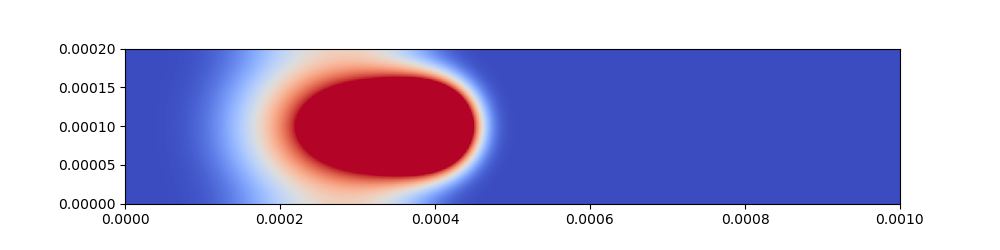

example.T.shape = (464, 93, 46, 1)


In [89]:
plt.figure(figsize=(10, 2.5))

print(f"example.T.shape = {example.T.shape}")

pcm = plt.imshow(example.T[:, :, -1, 0].T,
                 origin='lower',
                 cmap='coolwarm',
                 vmin=300,
                 vmax=1563,
                 extent=[0., domain_x, 0., domain_y])

# u = example.vel[:, :, -1, 0].flatten()
# v = example.vel[:, :, -1, 1].flatten()
# xinterval = 1
# yinterval = 1
# plt.quiver(mesh.surface[mesh.surf_sets[-1]][:, 0],
#            mesh.surface[mesh.surf_sets[-1]][:, 1],
#            u,
#            v,
#            color='white',
#            scale=1000)
# plt.colorbar(pcm, orientation='horizontal')


<IPython.core.display.Javascript object>


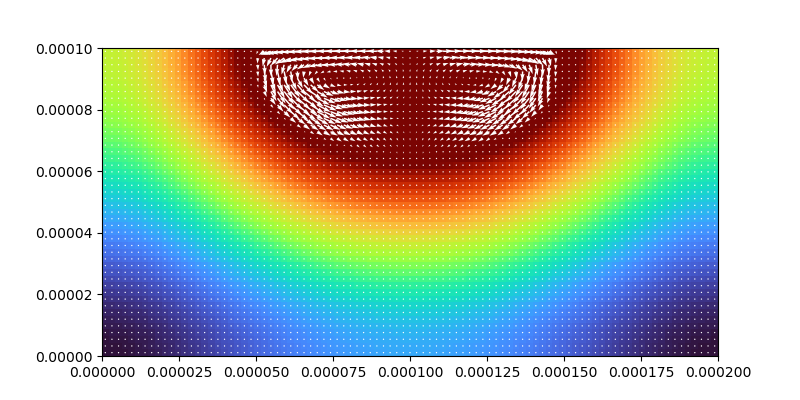

In [87]:
xl = 130
plt.figure(figsize=(8, 4))
pcm = plt.imshow(example.T[xl, :, :, 0].T,
                 origin='lower',
                 cmap='turbo',
                 vmax=1563,
                 extent=[0., domain_y, 0., domain_z])


v = example.vel[xl, :, :, 1].flatten()
w = example.vel[xl, :, :, 2].flatten()
plt.quiver(mesh.surface[mesh.surf_sets[0]][:,1],
           mesh.surface[mesh.surf_sets[0]][:,2],
           v,
           w,
           color='white',
           scale=5)